In [1]:
#import libraries

In [127]:
import pandas as pd

In [128]:
import numpy as np 

In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

In [27]:
from datetime import datetime

In [5]:
Sheet_one = pd.read_excel(r'C:\Users\Chinedu\Downloads\online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [6]:
Sheet_two = pd.read_excel(r'C:\Users\Chinedu\Downloads\online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [7]:
#Combine the two sheets

In [8]:
data = pd.concat([Sheet_one, Sheet_two], ignore_index=True)

In [9]:
#Quickly understand my data structure

In [12]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [13]:
data.shape

(1067371, 8)

In [14]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
#Drop Null values in the dataset

In [37]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
TotalPrice          0
dtype: int64

In [38]:
data = data.dropna()

In [39]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [40]:
data.shape

(824364, 9)

In [ ]:
# Add new column Total Price (Quantity * Price)

In [101]:
data['TotalSales'] = data['Quantity'] * data['Price']

In [102]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0,45.0


In [ ]:
## USING RFM TO DO A CUSTOMER SEGMENTATION ON THE SALES DATA

In [ ]:
# RFM Calculation (Recency, Frequency, Monetary)

In [42]:
reference_date = data['InvoiceDate'].max() + pd.DateOffset(1)

In [34]:
print(reference_date)

2011-12-10 12:50:00


In [43]:
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

In [36]:
rfm.head(10)

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,17,-64.68
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,5,4404.54
12350.0,310,1,334.40
12351.0,375,1,300.93
12352.0,36,13,1889.21
12353.0,204,2,406.76
12354.0,232,1,1079.40


In [ ]:
#Rename the columns accordingly

In [44]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
#Consider only customers with postive monetary value

In [45]:
rfm = rfm[rfm['Monetary'] > 0]

In [ ]:
# RFM Scoring

In [46]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [47]:
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [48]:
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [49]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [51]:
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [52]:
rfm.head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12347.0,2,8,5633.32,5,4,5,545,14
12348.0,75,5,2019.40,3,3,4,334,10
12349.0,19,5,4404.54,4,3,5,435,12
12350.0,310,1,334.40,2,1,2,212,5
12351.0,375,1,300.93,2,1,2,212,5
12352.0,36,13,1889.21,4,5,4,454,13
12353.0,204,2,406.76,2,2,2,222,6
12354.0,232,1,1079.40,2,1,3,213,6
12355.0,214,2,947.61,2,2,3,223,7


In [ ]:
#Segmentation

In [75]:
def segment_customers(df):
    if df['RFM_Score'] == 15:
        return 'Platinum Customers'
    elif df['RFM_Score'] >= 12:
        return 'Gold Customers'
    elif df['RFM_Score'] >= 9:
        return 'Silver Customers'
    elif df['RFM_Score'] >= 6:
        return 'Bronze Customers'
    else:
        return 'Low-Value Customers'

In [ ]:
rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

In [ ]:
#Visualization

In [77]:
segment_counts = rfm['Customer_Segment'].value_counts()

In [78]:
print(segment_counts)

Bronze Customers       1448
Silver Customers       1423
Low-Value Customers    1264
Gold Customers         1223
Platinum Customers      484
Name: Customer_Segment, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronze Customers'),
  Text(1, 0, 'Silver Customers'),
  Text(2, 0, 'Low-Value Customers'),
  Text(3, 0, 'Gold Customers'),
  Text(4, 0, 'Platinum Customers')])

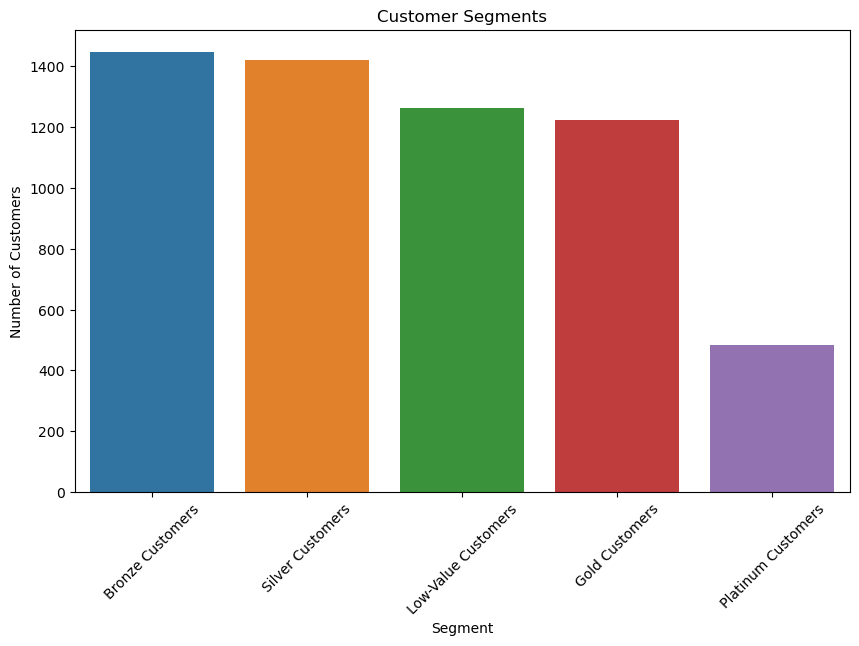

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

In [ ]:
## Performing sales forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model

In [ ]:
# install required libraries

In [ ]:
pip install statsmodels pmdarima

In [85]:
from statsmodels.tsa.arima.model import ARIMA

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [87]:
from pmdarima import auto_arima

In [ ]:
# Group by date to get daily/weekly/monthly sales. We'll use daily sales here:

In [125]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0


In [143]:
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

In [144]:
daily_sales.head()


,InvoiceDate,TotalSales
0,2009-12-01,42708.22
1,2009-12-02,52578.19
2,2009-12-03,61534.22
3,2009-12-04,33686.86
4,2009-12-05,9803.05


In [145]:
# Set 'InvoiceDate' as index for time series analysis
daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])

In [142]:
print(daily_sales.columns)

Index(['InvoiceDate', 'TotalSales'], dtype='object')


In [146]:
daily_sales.set_index('InvoiceDate', inplace=True)

In [148]:
print(type(daily_sales.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [149]:
daily_sales = daily_sales.asfreq('D')

In [ ]:
# Display the first few rows

In [106]:
print(daily_sales.head())

             TotalSales
InvoiceDate            
2009-12-01     42708.22
2009-12-02     52578.19
2009-12-03     61534.22
2009-12-04     33686.86
2009-12-05      9803.05


In [ ]:
#Visualize Time Series Data (To identify trends and seasonality in the time series)

In [100]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

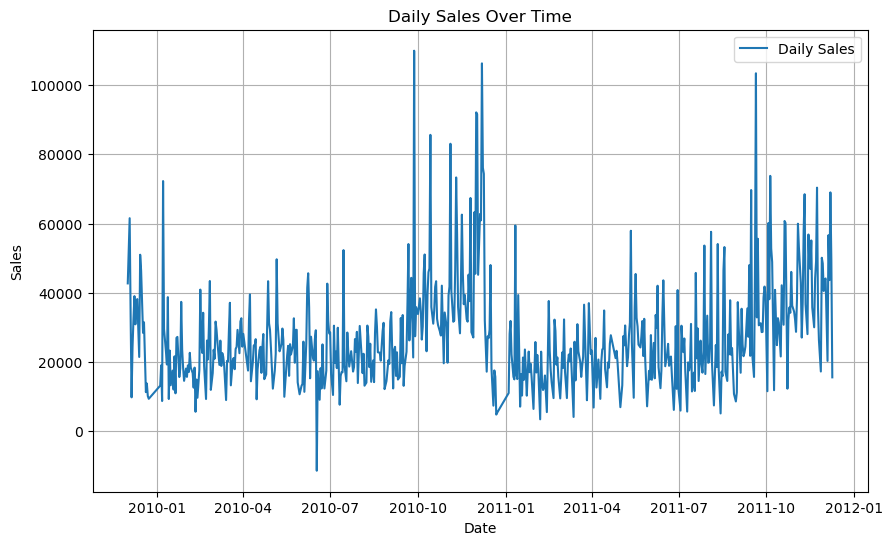

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['TotalSales'], label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Decompose the Time Series (Check for Trend and Seasonality)

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [113]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales['TotalSales'], model='additive', period=30)

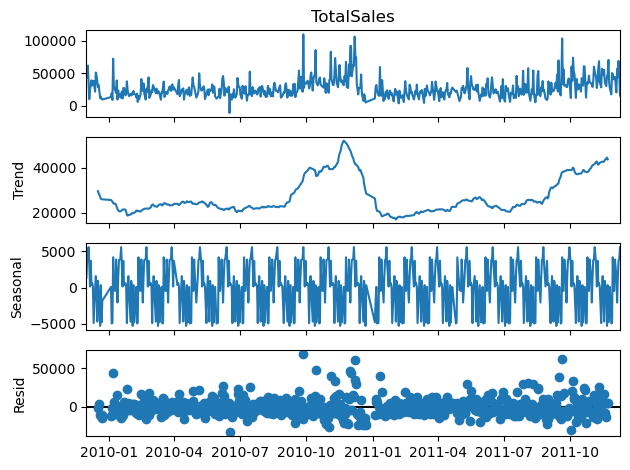

In [114]:
# Plot the decomposed components
decomposition.plot()
plt.show()

In [ ]:
##Trend: Shows whether there is an upward or downward movement in sales over time.
##Seasonality: Reflects recurring patterns in the data (e.g., daily, weekly, monthly).
##Residuals: The random noise component.

In [ ]:
## Make the Time Series Stationary

In [115]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
result = adfuller(daily_sales['TotalSales'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the p-value is > 0.05, the series is not stationary, and we may need differencing

ADF Statistic: -2.605429599866257
p-value: 0.09188026413992395


In [ ]:
#Since the series is not stationary, apply differencing to remove the trend:

In [116]:
# First-order differencing
daily_sales_diff = daily_sales['TotalSales'].diff().dropna()

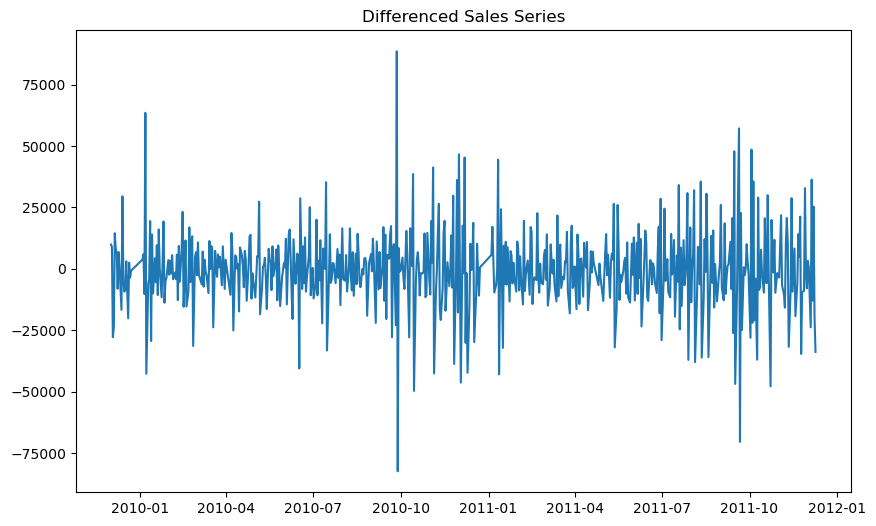

In [117]:
# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_diff)
plt.title('Differenced Sales Series')
plt.show()

In [ ]:
#Use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine the appropriate AR (p) and MA (q) parameters for ARIMA.

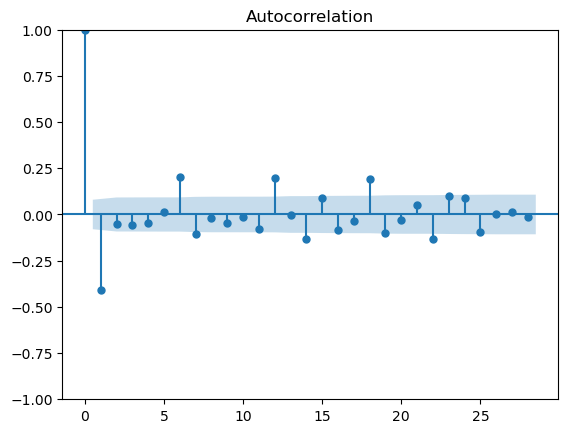

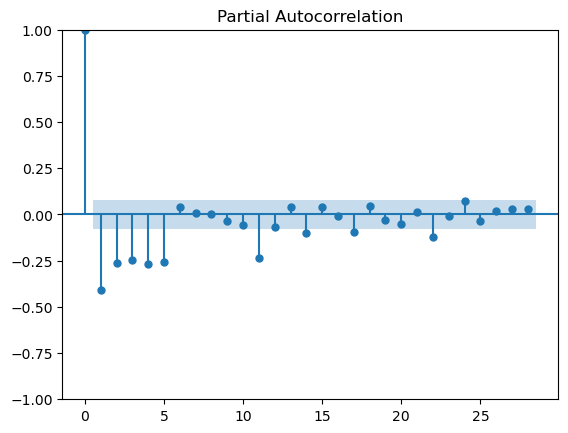

In [118]:
# Plot ACF and PACF
plot_acf(daily_sales_diff)
plot_pacf(daily_sales_diff)
plt.show()

In [ ]:
##ACF: Helps identify the MA (Moving Average) term.
##PACF: Helps identify the AR (AutoRegressive) term.

In [ ]:
##use auto_arima from pmdarima to automatically select the best ARIMA model.

In [119]:
# Use auto_arima to determine the best p, d, q values
auto_model = auto_arima(daily_sales['TotalSales'], seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13157.929, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13416.138, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13310.916, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13167.794, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13414.143, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13157.975, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13161.196, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13158.750, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13129.202, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13157.014, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13131.028, Time=1.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13131.296, Time=1.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13160.501, Time=0.38 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=13131.156, Time=1.28 sec
 ARIMA(2,1,3)(0,0,0

In [ ]:
##Build the ARIMA Model

In [ ]:
#order(p,d,q) where p is the AutoRegressive term (AR), d is Differencing term/Integrated part (I) and q is Moving Average term (MA)

In [150]:
model = ARIMA(daily_sales['TotalSales'], order=(2, 1, 3))

In [133]:
# Fit the model


In [151]:
arima_result = model.fit()

In [152]:
# Display the summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                  739
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6577.942
Date:                Fri, 18 Oct 2024   AIC                          13167.884
Time:                        16:18:02   BIC                          13195.508
Sample:                    12-01-2009   HQIC                         13178.536
                         - 12-09-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4364      0.224      1.945      0.052      -0.003       0.876
ar.L2         -0.6313      0.175     -3.609      0.000      -0.974      -0.288
ma.L1         -1.2012      0.215     -5.599      0.0

In [ ]:
#Make Predictions and Plot the Forecast

In [153]:
# Forecast future sales (e.g., next 30 days)
forecast = arima_result.forecast(steps=30)

In [ ]:
# Plot the actual and forecasted sales

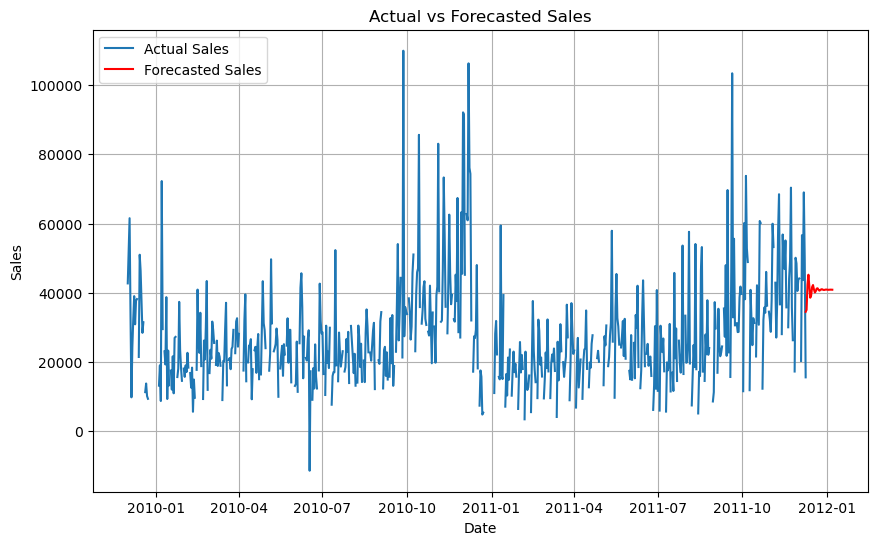

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['TotalSales'], label='Actual Sales')
plt.plot(pd.date_range(start=daily_sales.index[-1], periods=30, freq='D'), forecast, label='Forecasted Sales', color='red')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
forecast.head(30)

2011-12-10    34496.040142
2011-12-11    35069.667968
2011-12-12    42381.763390
2011-12-13    45210.487971
2011-12-14    41828.665551
2011-12-15    38567.088129
2011-12-16    39278.786534
2011-12-17    41648.436963
2011-12-18    42233.203810
2011-12-19    40992.392609
2011-12-20    40081.754178
2011-12-21    40467.709406
2011-12-22    41211.031630
2011-12-23    41291.744941
2011-12-24    40857.697272
2011-12-25    40617.331455
2011-12-26    40786.460463
2011-12-27    41012.011467
2011-12-28    41003.664316
2011-12-29    40857.628344
2011-12-30    40799.170608
2011-12-31    40865.855233
2012-01-01    40931.860341
2012-01-02    40918.564839
2012-01-03    40871.093001
2012-01-04    40858.770798
2012-01-05    40883.363235
2012-01-06    40901.874097
2012-01-07    40894.426354
2012-01-08    40879.490137
Freq: D, Name: predicted_mean, dtype: float64

In [163]:
##Use the time series trend and seasonality components to identify key periods of high and low sales.
#Forecast Accuracy: Review forecast accuracy to assess the reliability of the predictions.
#Recommendations: Provide management with insights such as:
#Expected increase/decrease in sales for future periods.
#Seasonal trends to consider when planning marketing or promotions.
#Potential areas for optimizing inventory and supply chain planning.